## 2章　確率分布と統計モデルの最尤推定

In [1]:
load("data.RData")

In [3]:
data

[1] 2 2 4 6 4 5 2 3 1 2 0 4 3 3 3 3 4 2 7 2 4 3 3 3 4 3 7 5 3 1 7 6 4 6 5 2 4 7
[39] 2 2 6 2 4 5 4 5 1 3 2 3

In [4]:
length(data)

[1] 50

In [5]:
summary(data)#概要

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    2.00    3.00    3.56    4.75    7.00 

In [6]:
table(data) #度数分布

data
 0  1  2  3  4  5  6  7 
 1  3 11 12 10  5  4  4 

In [7]:
options(repr.plot.width=4, repr.plot.height=4) # 図のサイズ変更

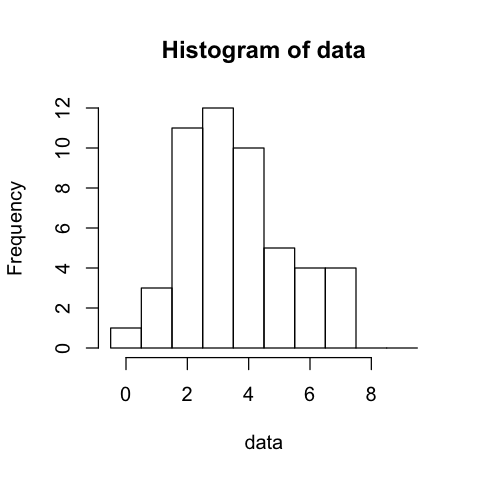

In [8]:
hist(data, breaks = seq(-0.5, 9.5, 1))

In [9]:
var(data) # 標本分散

[1] 2.986122

In [10]:
sd(data)　# 標本標準偏差

[1] 1.72804

In [11]:
sqrt(var(data))

[1] 1.72804


### 確率分布：確率変数の値とそれが出現する確率を対応させたもの

### e.g. ある植物個体 $i$ の種子数 $y_i$ のようにばらつく変数　→　確率変数

### 確率変数 $y_i=2$ といった値をとる時の確率はどのくらいなのかに興味がある

# ポアソン分布：Poisson distribution

## 平均3.56のポアソン分布にしたがって種子数が$y$ であると観測される確率を生成する

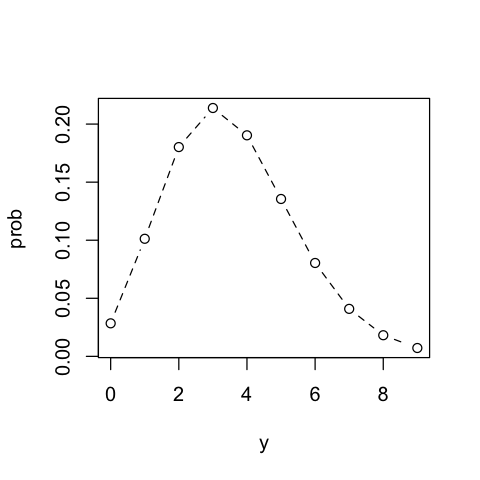

In [12]:
y <- 0:9
prob <- dpois(y, lambda = 3.56) # ある個体種子数がy個である確率
plot(y, prob, type = "b", lty=2) # type="b" 丸と折れ線による図　lty=2 破線

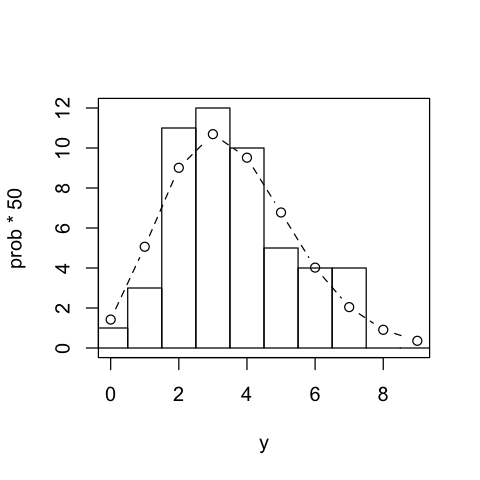

In [13]:
plot(y, prob*50, type = "b", lty=2, ylim =c(0,12))
hist(data, breaks = seq(-0.5, 9.5, 1), add=T)

## ポアソン分布について
 ## $$ p(y|\lambda) = \frac{\lambda^yexp(-\lambda)}{y!} $$
 
## 平均がλのとき確率変数がyの値になる確率
## ・λはポアソン分布の唯一のパラメーター

## ・$ \sum_{y=0}^\infty p(y\,|\,\lambda) = 1 $
## ・分散と平均が等しい　λ＝μ＝σ^2


## なぜポアソン分布を使ったか
・データが非負の整数　$y_i \ge 0$  $y_i \in N$

・$y_i$ に下限があるが上限は不明

・平均と分散がだいたい等しい

## 最尤推定
### 確率分布のパラメータを観測データに基づき推定する

尤度（あてはまりのよさ）を最大にするように推定

あるλの値を決めた時にすべての個体についての$p(y_i\,|\, \lambda)$の積

$$\prod_ip(y_i\,|\,\lambda)=\prod_i\frac{\lambda^{y_i}exp(-\lambda)}{y_i!}$$

データ全体　→　$\{y_i\}\; or\; \{Y\}$

## 対数最尤度関数
$$logL(\lambda) = \sum_i(y_ilog\lambda-\lambda-\sum_k^{y_i}logk)$$

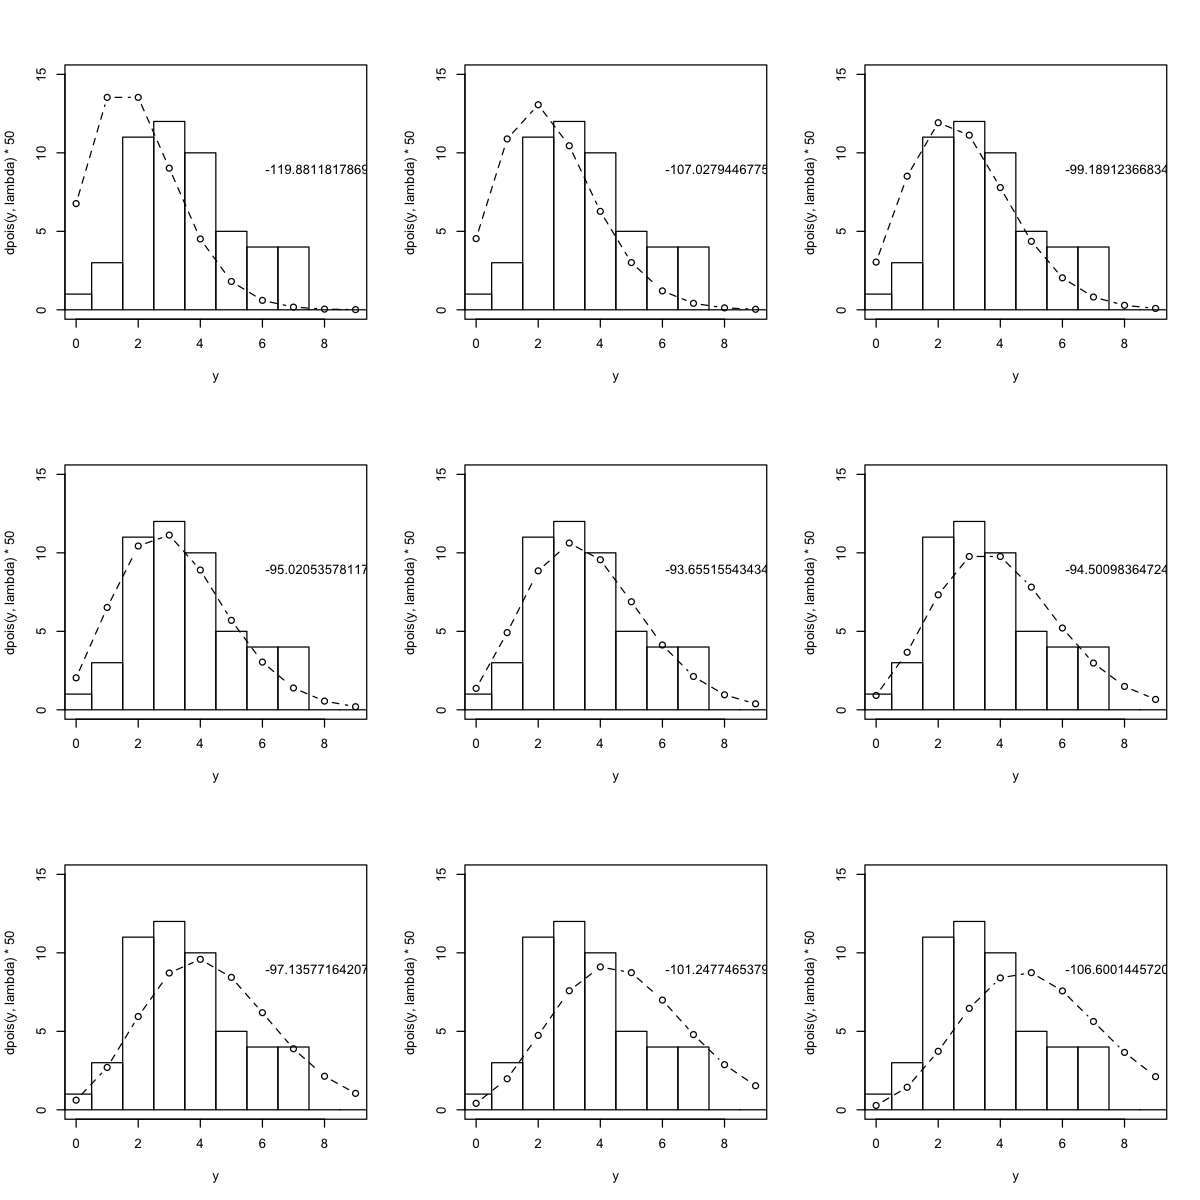

In [14]:
par(mfrow=c(3,3))　
options(repr.plot.width=10, repr.plot.height=10)

#log likelihood functon
llf <- function(y,lambda){ 
        y*log(lambda)-lambda-sum(log(1:y))
        }



for (i in 1:9){
    lambda = 1.6 + 0.4*i
    plot(y, dpois(y, lambda)*50, type = "b", lty=2, ylim =c(0,15))
    hist(data, breaks = seq(-0.5, 9.5, 1), add=T)
    adata = sapply(matrix(data),lambda,FUN=llf)
    adata = ifelse((is.infinite(adata)) , 0, adata)
    logL = sum(adata)
    text(8,9,labels=paste(logL))}

In [15]:
options(repr.plot.width=4, repr.plot.height=4)

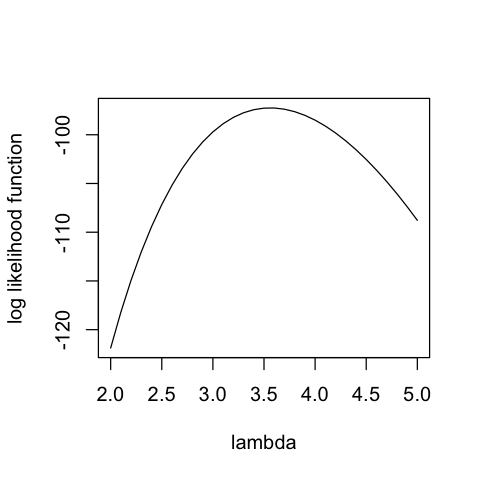

In [16]:
logL <- function(m) sum(dpois(data, m, log=TRUE))
lambda <- seq(2,5,0.1)
plot(lambda, sapply(lambda, logL), type = "l", ylab = "log likelihood function")

In [17]:
rpois(50, 3.5)

[1] 2 3 3 5 1 2 4 6 3 4 1 6 2 3 1 0 5 3 4 2 4 2 3 1 2 6 3 2 4 2 2 5 5 3 5 4 5 5
[39] 6 2 4 2 4 1 3 4 5 4 1 9

# 一般化線系モデル(generalized liner model, GLM)

In [18]:
d <- read.csv("data3a.csv") # データフレーム 表のようにあつかえる

In [19]:
d

y,x,f
6,8.31,C
6,9.44,C
6,9.50,C
12,9.07,C
10,10.16,C
4,8.32,C
9,10.61,C
9,10.06,C
9,9.93,C
11,10.43,C


In [20]:
d$x

[1]  8.31  9.44  9.50  9.07 10.16  8.32 10.61 10.06  9.93 10.43 10.36 10.15
 [13] 10.92  8.85  9.42 11.11  8.02 11.93  8.55  7.19  9.83 10.79  8.89 10.09
 [25] 11.63 10.21  9.45 10.44  9.44 10.48  9.43 10.32 10.33  8.50  9.41  8.96
 [37]  9.67 10.26 10.36 11.80 10.94 10.25  8.74 10.46  9.37  9.74  8.95  8.74
 [49] 11.32  9.25 10.14  9.05  9.89  8.76 12.04  9.91  9.84 11.87 10.16  9.34
 [61] 10.17 10.99  9.19 10.67 10.96 10.55  9.69 10.91  9.60 12.37 10.54 11.30
 [73] 12.40 10.18  9.53 10.24 11.76  9.52 10.40  9.96 10.30 11.54  9.42 11.28
 [85]  9.73 10.78 10.21 10.51 10.73  8.85 11.20  9.86 11.54 10.03 11.88  9.15
 [97]  8.52 10.24 10.86  9.97

In [21]:
d$f # factor class

[1] C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C
 [38] C C C C C C C C C C C C C T T T T T T T T T T T T T T T T T T T T T T T T
 [75] T T T T T T T T T T T T T T T T T T T T T T T T T T
Levels: C T

In [22]:
class(d)

[1] "data.frame"

In [23]:
class(d$y)

[1] "integer"

In [24]:
class(d$f)

[1] "factor"

In [25]:
summary(d)

       y               x          f     
 Min.   : 2.00   Min.   : 7.190   C:50  
 1st Qu.: 6.00   1st Qu.: 9.428   T:50  
 Median : 8.00   Median :10.155         
 Mean   : 7.83   Mean   :10.089         
 3rd Qu.:10.00   3rd Qu.:10.685         
 Max.   :15.00   Max.   :12.400         

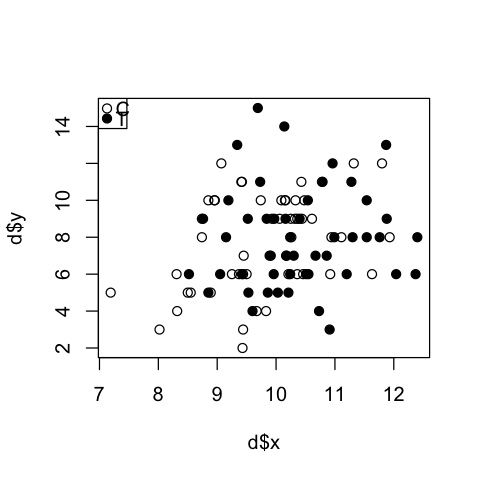

In [26]:
plot(d$x, d$y, pch = c(21,19)[d$f])
legend("topleft", legend = c("C", "T"), pch = c(21,19))

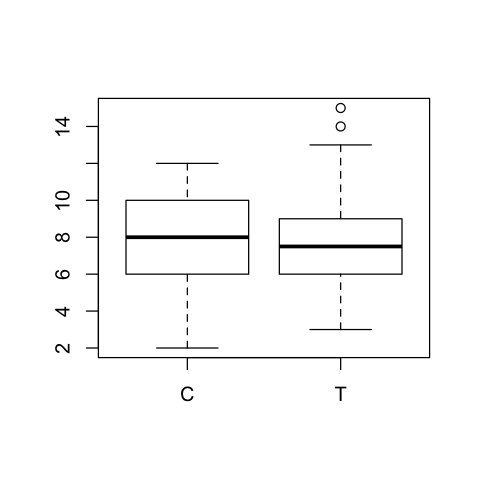

In [27]:
plot(d$f, d$y)

### 線形予測子と対応リンク関数

個体iにおいて種子数が$y_i$である確率$p(y_i\;|\;\lambda_i$)はポアソン分布
$$p(y_i\;|\;\lambda_i) = \frac{\lambda^{y_i}_iexp(-\lambda)}{y_i!}$$

に従っていると仮定する

ある個体iの平均種子数$\lambda_i$が
$$\lambda_i = exp(\beta_1+\beta_2x_i)$$
であるとする

これは$$\log\lambda_i = \beta_1+ \beta_2 x_i$$と変形できる。右辺を線形予測子、左辺をリンク関数と呼ぶ

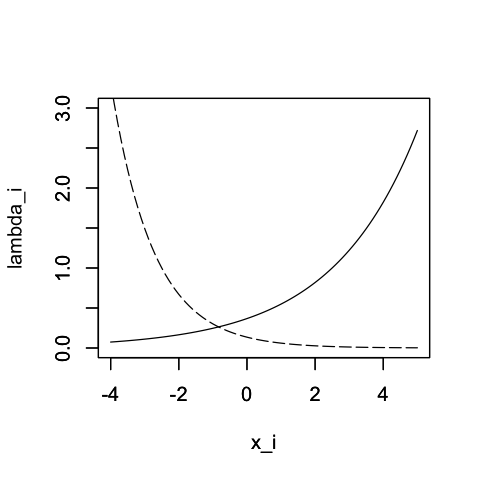

In [28]:
lambda_i <- function(beta1,beta2,x_i) exp(beta1 + beta2*x_i)
x_i <- seq(-4,5,0.1)
plot(x_i, sapply(-2,-0.8,x_i,FUN = lambda_i), type="l", lty=5, ylim=c(0,3),ylab="")
par(new=T)
plot(x_i, sapply(-1,0.4,x_i,FUN = lambda_i), type="l", lty=1,ylim=c(0,3),ylab="lambda_i")

ポアソン回帰　→　観測データに関するポアソン分布をつかった統計モデルのあてはめ(fitting),対数尤度(logL)が最大になるようにパラメータの推定値をきめる

データ　Y　のもとでの、このモデルの対数尤度は
$$\log L (\beta_1,\beta_2)=\sum_i\log\frac{\lambda^{y_i}_i\exp(-\lambda_i)}{y_i!}$$

In [29]:
fit <- glm(y~x, data = d, family =poisson)

In [30]:
fit


Call:  glm(formula = y ~ x, family = poisson, data = d)

Coefficients:
(Intercept)            x  
    1.29172      0.07566  

Degrees of Freedom: 99 Total (i.e. Null);  98 Residual
Null Deviance:	    89.51 
Residual Deviance: 84.99 	AIC: 474.8

In [31]:
summary(fit)


Call:
glm(formula = y ~ x, family = poisson, data = d)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3679  -0.7348  -0.1775   0.6987   2.3760  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.29172    0.36369   3.552 0.000383 ***
x            0.07566    0.03560   2.125 0.033580 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 89.507  on 99  degrees of freedom
Residual deviance: 84.993  on 98  degrees of freedom
AIC: 474.77

Number of Fisher Scoring iterations: 4



intercept = 切片$\beta_1$
x = $\beta_2$

estimate = 最尤推定値であることを表す

std.Error = パラメータの標準誤差の推定値(SE), βのばらつきを標準偏差で表している
            
 推定のばらつきが正規分布であると仮定しさらに対数尤度関数は最大値付近で正規分布に近いかたちであると仮定した場合

z value =  最尤推定値/SE, Wald統計量(Wald statistic)
           
 これによりwald信頼区間が形成でき、推定値が十分にゼロから離れているかどうかの一定の目安となる
           
Pr(>|z|) = (このGLMに関しては）平均がz値の絶対値であり標準偏差が１の正規分布における、マイナス無限大からゼロまでの値をとる確率の２倍
            
   この値が大きいほど推定値$\;\hat{\beta}\;$がゼロに近いことを表現する方法のひとつ。P値にみたてて検定したり信頼区間を近似的にだせたり

## 最大対数尤度(maximum log likelihood)

この本においてはあてはまりのよさ(goodness of fit)

対数尤度が最大（つまりは最尤推定値になっている）ときの対数尤度

In [32]:
logLik(fit) # 最大対数尤度の評価　df　＝　degrees of freedom 自由度

'log Lik.' -235.3863 (df=2)

# ポアソン回帰モデルによる予測
上記ででたβの推定値をつかう
$$\lambda = \exp(1.29 + 0.0757x)$$

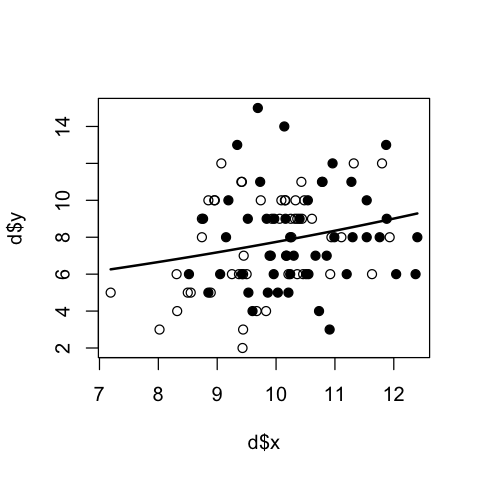

In [33]:
plot(d$x, d$y,pch= c(21,19)[d$f])
xx <- seq(min(d$x), max(d$x), length=100)
lines(xx, exp(1.29 + 0.0757 * xx), lwd=2)

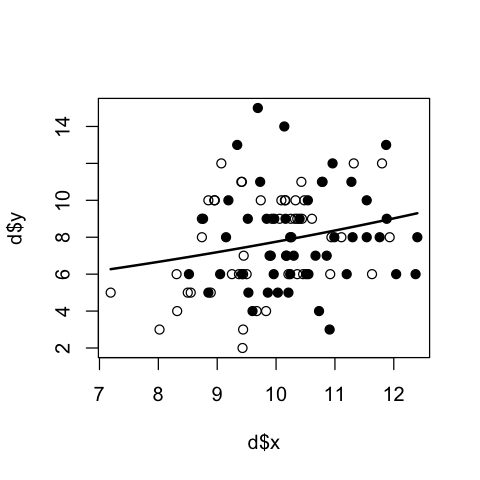

In [34]:
plot(d$x, d$y,pch= c(21,19)[d$f])
yy <- predict(fit,type="response", newdata = data.frame(x = xx))
lines(xx, yy, lwd =2)

## 3.5 説明変数が因子型の統計モデル

堆肥効果$\:f_i\:$を説明変数として組み込んだモデルの検討←因子型のデータとして保存してある(C or T)

因子型の説明変数（カテゴリ変数）はダミー変数(dummy variable)におきかえられる

植物の体サイズ$x_i$を無視して、堆肥効果$f_i$のみが影響するモデルの平均値は
$$\lambda_i = exp(\beta_1+\beta_3d_i)$$

$\beta_1$ = 切片

$\beta_3$ = 堆肥の効果

ここでは$f_i$が置き換えられて$d_i$というダミー変数に置き換えられ、以下のような値をとる

$$
  d_i = \left\{ \begin{array}{ll}
    0 & (f_i = C の場合、堆肥なし) \\
    1 & (f_i = T の場合、堆肥あり)
  \end{array} \right.
$$

$d_i=0$で$\lambda=exp(\beta_1)$、　$d_i = 1$で$\lambda = exp(\beta_1+\beta_3)$となる

In [35]:
# Rではとくに工夫もなく指定もなくつかえる
fit.f <- glm(y~f, data = d, family = poisson)

In [36]:
fit.f


Call:  glm(formula = y ~ f, family = poisson, data = d)

Coefficients:
(Intercept)           fT  
    2.05156      0.01277  

Degrees of Freedom: 99 Total (i.e. Null);  98 Residual
Null Deviance:	    89.51 
Residual Deviance: 89.48 	AIC: 479.3

個体iの$f_i$がCならば
$$\lambda_i = exp(2.05+0)=0.77$$

Tならば
$$\lambda_i = exp(2.05+0.0128)=7.87$$

In [37]:
logLik(fit.f)

'log Lik.' -237.6273 (df=2)

## 3.6 説明変数が数量型＋因子型のモデル

体サイズ$x_i$と堆肥効果$f_i$の複数の説明変数を使った統計モデル

GLMでは線形予測子の中で和として表現する
$$\log\lambda_i = \beta_i + \beta_2x_i + \beta_3d_i$$

In [38]:
fit.all <- glm(y~x + f, data = d, family = poisson)

In [39]:
fit.all


Call:  glm(formula = y ~ x + f, family = poisson, data = d)

Coefficients:
(Intercept)            x           fT  
    1.26311      0.08007     -0.03200  

Degrees of Freedom: 99 Total (i.e. Null);  97 Residual
Null Deviance:	    89.51 
Residual Deviance: 84.81 	AIC: 476.6


上の結果では堆肥効果fTがマイナスだと推定されている

対応リンク関数では要因の効果が積で表される
$$\lambda_i = exp(1.26 + 0.08x_i -　0.032)\\
\lambda_i = exp(1.26) * exp(0.08x_i) * exp(-0.032)\\
= （定数）＊（サイズの効果）＊（堆肥処理の効果）$$

In [40]:
glm(y~x, data = d, family = gaussian(link="log"))


Call:  glm(formula = y ~ x, family = gaussian(link = "log"), data = d)

Coefficients:
(Intercept)            x  
    1.33951      0.07098  

Degrees of Freedom: 99 Total (i.e. Null);  98 Residual
Null Deviance:	    682.1 
Residual Deviance: 648.9 	AIC: 476.8

## GLMのモデル選択-AICとモデルの予測の良さ-

良いモデルとはなにか？→最大対数尤度(maximum log likelihood)か？

まず逸脱度(deviance)について

逸脱度:あてはまりのわるさ.最大対数尤度を変形したやつ

簡易化のため対数尤度($logL({\beta_i})$)をlogL,最大対数尤度は$logL^*$と表記する。
逸脱度は
$$D = -2logL^*$$
と定義される( 式の形は$\chi^2$分布と対応関係がよくなるため）

最小逸脱度：フルモデル（データ数＝パラメーター数）を当てはめた時のD

Residual Deviance(残差逸脱度）： D - (フルモデルによるポアソン分布で可能な最小の逸脱度）

最大逸脱度：NULLmodelをあてはめた時のD

Null逸脱度：最大のDー最小のD


In [41]:
logLik(fit)

'log Lik.' -235.3863 (df=2)

In [42]:
-2*-235.4

[1] 470.8

しかしglm()で求めると

In [43]:
fit


Call:  glm(formula = y ~ x, family = poisson, data = d)

Coefficients:
(Intercept)            x  
    1.29172      0.07566  

Degrees of Freedom: 99 Total (i.e. Null);  98 Residual
Null Deviance:	    89.51 
Residual Deviance: 84.99 	AIC: 474.8


470.8なんてない

代わりにNull deviance,Residual Devianceがある

residual deviance:D-(ポアソン分布で可能な最小の逸脱度）

最小逸脱度とは、full modelつまりデータと同じだけのパラメータをつかって当てはめたモデルの逸脱度

→当然統計モデルとして意味なし

In [44]:
devi <- sum(log(dpois(d$y, lambda = d$y)))#最小逸脱度

In [45]:
devi

[1] -192.8898

In [46]:
(-2*-235.4)-(-2*devi)#residual deviance 前のと一致

[1] 85.02049

残差逸脱度の最大値を考えてみる

もっともあてはまりの悪いモデル→このポアソン回帰ではもっともパラメータ数の少ないモデル、切片のみ$\lambda_i = exp(\beta_1)$

これをnull modelと呼ぶ

In [47]:
fit.null <- glm(formula = y~1, family = poisson, data=d) # null model

In [48]:
fit.null


Call:  glm(formula = y ~ 1, family = poisson, data = d)

Coefficients:
(Intercept)  
      2.058  

Degrees of Freedom: 99 Total (i.e. Null);  99 Residual
Null Deviance:	    89.51 
Residual Deviance: 89.51 	AIC: 477.3

In [49]:
logLik(fit.null)

'log Lik.' -237.6432 (df=1)

よって逸脱度は約473.5残差逸脱度は89.5
パラメーター数の増やせば残差逸脱度はどんどん小さくなる

# モデル選択基準AIC


パラメーター数を増やす事によって予測の良さを損なっていないか？

AIC ⇨　予測の良さを統計モデルの良さとして扱う

AIC = -2{（最大対数尤度）- （最尤推定したパラメーター数）}
    
    = -2(logL* - k)
    
    = D + 2k
    
これが一番小さいモデルがいいモデル

* ４章５章とばして６章へ